In [29]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf



In [30]:
# Set batch size and create an ImageDataGenerator object for training data
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1/255)

In [31]:
# Define the directory containing training data and specify classes explicitly
train_generator = train_datagen.flow_from_directory(
    '/home/rupesh/Desktop/Dog/Dog-Breed-Identification/Test2',
        target_size=(100, 100),
        batch_size=batch_size,
        classes = ['n02110958-pug', 'n02085782-Japanese_spaniel', 'n02112137-chow','human'],
        class_mode='categorical')

Found 581 images belonging to 4 classes.


In [32]:
# Build the CNN architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])


In [33]:
# Compile the model with loss function, optimizer, and metrics
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])


In [34]:

# Train the model
total_sample = train_generator.n
n_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=int(total_sample/batch_size),
    epochs=n_epochs,
    verbose=1)


Epoch 1/20


2023-04-29 17:09:09.820003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


18/18 [==============================] - 3s 157ms/step - loss: 1.2061 - acc: 0.3461
Epoch 2/20
18/18 [==============================] - 3s 156ms/step - loss: 1.1142 - acc: 0.3716
Epoch 3/20
18/18 [==============================] - 3s 158ms/step - loss: 1.0895 - acc: 0.4135
Epoch 4/20
18/18 [==============================] - 3s 166ms/step - loss: 1.0491 - acc: 0.4809
Epoch 5/20
18/18 [==============================] - 3s 167ms/step - loss: 0.9576 - acc: 0.6047
Epoch 6/20
18/18 [==============================] - 3s 159ms/step - loss: 0.8936 - acc: 0.6047
Epoch 7/20
18/18 [==============================] - 3s 150ms/step - loss: 0.8333 - acc: 0.6248
Epoch 8/20
18/18 [==============================] - 3s 155ms/step - loss: 0.8040 - acc: 0.6721
Epoch 9/20
18/18 [==============================] - 3s 156ms/step - loss: 0.6669 - acc: 0.7341
Epoch 10/20
18/18 [==============================] - 3s 177ms/step - loss: 0.6917 - acc: 0.7086
Epoch 11/20
18/18 [==============================] - 3s 159m

In [35]:
# Save the trained model
model.save('model4.h5')


In [36]:

# Test the model on a new image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model


In [37]:

# Load the saved model
model = load_model('model4.h5')


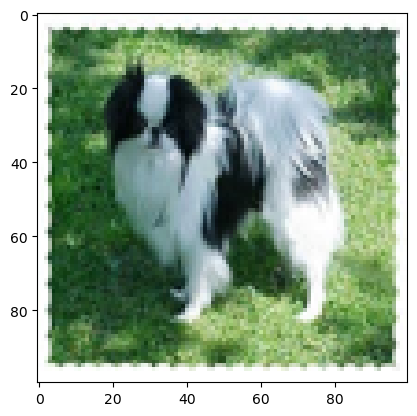

In [38]:

# Load the test image and preprocess it
test_image = Image.open(
    '/home/rupesh/Desktop/Dog/Dog-Breed-Identification/Test2/n02085782-Japanese_spaniel/n02085782_2.jpg')

test_image = test_image.resize((100, 100))
imageplot = plt.imshow(test_image)

x = np.array(test_image)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])


In [39]:

# Make a prediction on the test image and print the predicted class
result = model.predict(images, batch_size=10)

if result[0][0] == 1:
    print("This is a Pug")
elif result[0][1] == 1:
    print("This is a Japanese spaniel")
elif result[0][2] == 1:
    print("This is a Chow")
elif result[0][3] == 1:
    print("This is human")
else:
    print("Sorry")


1/1 [==============================] - 0s 77ms/step
This is a Japanese spaniel


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model

model = load_model('model4.h5')

test_image = Image.open(
    '/home/rupesh/Desktop/Dog/Dog-Breed-Identification/Test2/n02085782-Japanese_spaniel/n02085782_2.jpg')

test_image = test_image.resize((100, 100))
# imageplot = plt.imshow(test_image)

x = np.array(test_image)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

result = model.predict(images, batch_size=10)

if result[0][0] == 1:
    print("This is a Pug")
elif result[0][1] == 1:
    print("This is a Japanese spaniel")
elif result[0][2] == 1:
    print("This is a Chow")
elif result[0][3] == 1:
    print("This is human")
else:
    print("Sorry")

1/1 [==============================] - 0s 72ms/step
This is a Japanese spaniel
